In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:

df_train = pd.read_csv('./datasets/BostonHousing.csv')

print('Describe the datapoints of the dataset:')
print(df_train.columns)
print()

Describe the datapoints of the dataset:
Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')



In [17]:
# Describe the target variable
print('Our target variable is the median value of owner-occupied homes in $1000\'s: ')
print()
print(df_train['medv'].describe())

# Value is censored between 5K and 50K respectively

Our target variable is the median value of owner-occupied homes in $1000's: 

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64


Skewness: 1.108098
Kurtosis: 1.495197


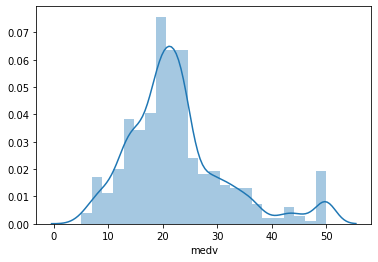

In [8]:
sns.distplot(df_train['medv'])

## Skewness:
# Measure of a dataset’s symmetry – or lack of symmetry.

# Skewness of a normal distribution is zero.
# If we have a positive skewness, the tail is at the right, and the peak is at the left.
# IF we have a negative skewness, the tail is at the left, and the peak is at the right.
print('Skewness: %f' % df_train['medv'].skew())

## Kurtosis:
# Measure of the combined weight of the tails relative to the rest of the distribution.

# Kurtosis shows us the 'peakiness' of the function
# kurtosis close to zero --> assume normal distribution and call it 'mesokurtic distribution'
# positive kurtosis --> heavy tails, we call it 'leptokurtic distribution'
# negative kurtosis --> light tails --> 'platykurtic distribution'
print('Kurtosis: %f' % df_train['medv'].kurt())

Text(0.5, 0, 'Avg. # of rooms / dwelling')

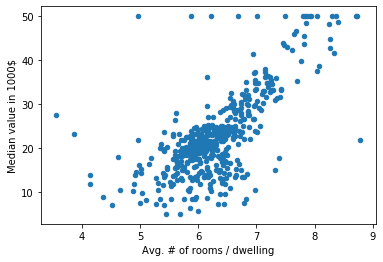

In [20]:
# 'RM' --> Average number of rooms per dwelling
data = pd.concat([df_train['medv'], df_train['rm']], axis = 1)
sct_plt = data.plot.scatter(x = 'rm', y = 'medv')
sct_plt.set_ylabel("Median value in 1000$")
sct_plt.set_xlabel("Avg. # of rooms / dwelling")

# We can see the linear correlation between the number of rooms and the value of a house
# There are some outliners as well, and we can see that the value is maximalized at 50K

Text(0, 0.5, 'Distances to employment centres')

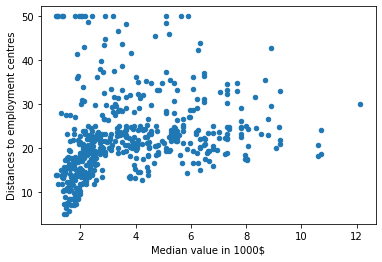

In [21]:
# 'DIS' --> Weighted distances to five Boston employment centres.
data = pd.concat([df_train['medv'], df_train['dis']], axis = 1)
sct_plt = data.plot.scatter(x = 'dis', y = 'medv')
sct_plt.set_xlabel("Median value in 1000$")
sct_plt.set_ylabel("Distances to employment centres")

# Here I cannot see any meaningful correlation!

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'Negros')

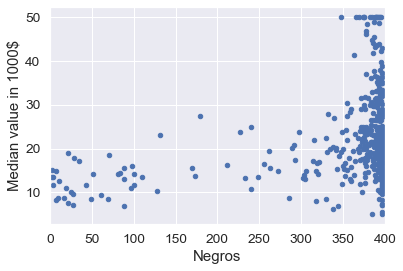

In [44]:
# 'DIS' --> Weighted distances to five Boston employment centres.
data = pd.concat([df_train['medv'], df_train['b']], axis = 1)
sct_plt = data.plot.scatter(x = 'b', y = 'medv', xlim=(0, 400))
sct_plt.set_ylabel("Median value in 1000$")
sct_plt.set_xlabel("Negros")

# Here I cannot see any meaningful correlation!

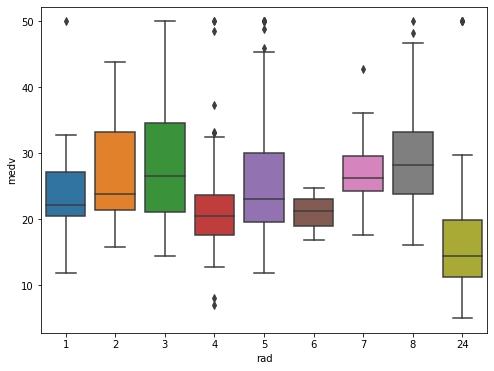

In [24]:
# 'DIS' --> index of accessibility to radial highways
data = pd.concat([df_train['medv'], df_train['rad']], axis = 1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='rad', y='medv', data = data)

# Here I cannot see any meaningful correlation as well!


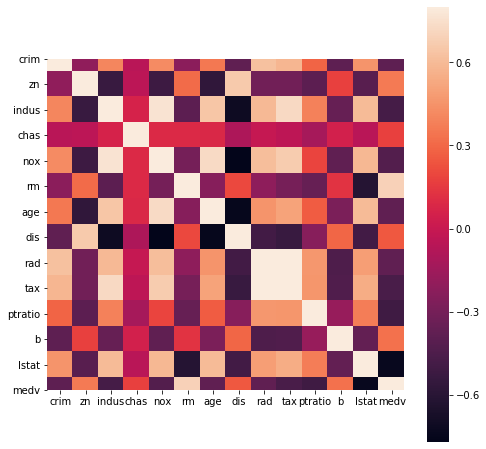

In [28]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=.8, square=True)

# Based on the correlation matrix:

# - value correlates with # of rooms
#   So the avargae house value is bigger if it has more rooms.

# - value invertedly corraletes to '% lower status of population'
#   So as more richer people are around, the neighboorhood is more expensive.

# - 'zn' and 'dis' are correlating
#   So as we go further from the center, there are bigger properties.

# - 'nox' and 'indus' are correlating:
#   So there are more business in the more air polluted areas. Makes sense.

# - 'age' also correlates to 'nox'
#   So in the more air polluted areas there are older houses - in the city center there are older houses.

# - 'indus', 'nox', 'age' are negatively correlate to 'dis'
#   So if we go further fro mthe center we find less shops. Makes sense!
#   So if we are in the suburbs the air is cleaner and the properites are younger..

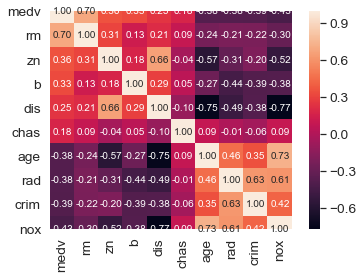

In [45]:
# medv correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'medv')['medv'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()